In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read_raw data 
raw_data = pd.read_csv("Data/data_enhanced.csv")
raw_data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review,rate
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,NaN,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,NaN,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,0.0


In [3]:
# Data information
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Numercal feature:
latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, rate

Categorical feature:
neighbourhood_group, neighbourhood, room_type, last_review

Text feature:
name, host_name, review

## Numercal Feature

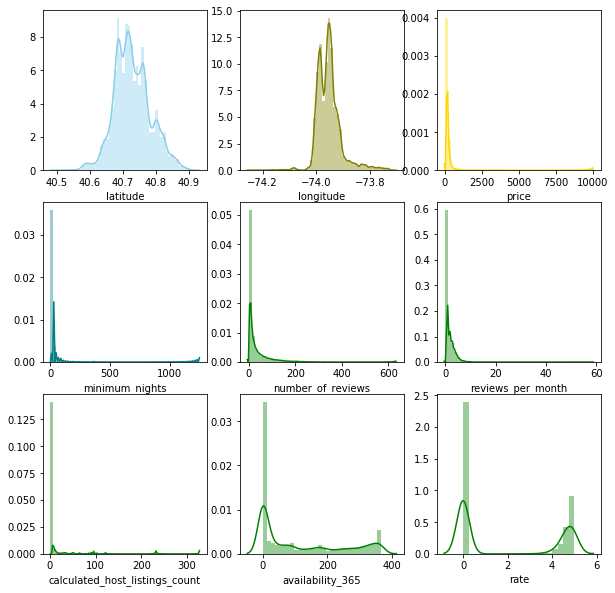

In [4]:
# Focus on numberal data
# fill na
tmp_list = ["latitude", "longitude", "price", "minimum_nights", 
          "number_of_reviews", "reviews_per_month", "calculated_host_listings_count",
          "availability_365", "rate"]
raw_data[tmp_list] = raw_data[tmp_list].fillna(0)
    
    
# plot
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False)
sns.distplot( raw_data["latitude"] , color="skyblue", ax=axes[0, 0])
sns.distplot( raw_data["longitude"] , color="olive", ax=axes[0, 1])
sns.distplot( raw_data["price"] , color="gold", ax=axes[0, 2])
sns.distplot( raw_data["minimum_nights"] , color="teal", ax=axes[1, 0])
sns.distplot( raw_data["number_of_reviews"] , color="green", ax=axes[1, 1])
sns.distplot( raw_data["reviews_per_month"] , color="green", ax=axes[1, 2])
sns.distplot( raw_data["calculated_host_listings_count"] , color="green", ax=axes[2, 0])
sns.distplot( raw_data["availability_365"] , color="green", ax=axes[2, 1])
sns.distplot( raw_data["rate"] , color="green", ax=axes[2, 2])




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


There are  388 outliers


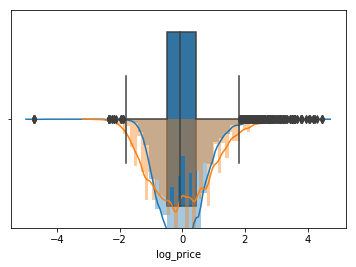

In [5]:
# Price feature
price = raw_data[["price"]]
price["log_price"] = np.log(price["price"] + 1) # log
# compute z-score
price['zscore'] = (price["log_price"] - price["log_price"].mean())/price["log_price"].std(ddof=0)
tmp = price[np.abs(price["zscore"]) <= 3 ]

# distribute plot
sns.distplot(price["log_price"] - price["log_price"].mean())
# z-score plot
sns.distplot(price[np.abs(price["zscore"]) <= 3]["zscore"])
# boxplot
sns.boxplot(price["log_price"] - price["log_price"].mean())

# Delete the outlier
raw_data["log_price"] = price["log_price"]
price_deleted = raw_data[np.abs(price["zscore"]) <= 3]

print("There are " , (raw_data["price"].count() - price_deleted["price"].count()) , "outliers")

For the price feature. We take log(price) to make them distribution closer to normal distribution. Besides that, we have to elimnate the outlier. The distribution of log(pirce), is shown in blue in pricture. And the boxplot is shown too. Since the price's range is big, the boxplot take some data that we might interested as outlier. So we use z-score to find outlier. The z-score distribution(with out outlier) are shown in orange. We can see that include more data than boxplot


There are  425 outliers


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


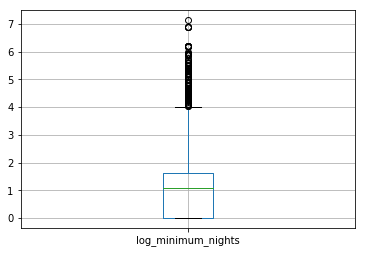

In [6]:
## Minimum_Night
mini_nights = price_deleted[["minimum_nights"]]
mini_nights["log_minimum_nights"] = np.log(mini_nights["minimum_nights"]) # log nigths

# plots
plot_info = mini_nights.boxplot(column="log_minimum_nights", return_type='dict')

# Delete outlier
threshold = plot_info["whiskers"][1].get_ydata()[1]
price_deleted["log_nights"] = mini_nights["log_minimum_nights"]
mini_nights_deleted = price_deleted[price_deleted["log_nights"] <= threshold]
print("There are " , price_deleted["log_nights"].count() - mini_nights_deleted["log_nights"].count() , "outliers")

For thr minimum_nights feature, we convert it to log(min_nights), and using boxplot to delete outliers, there are 425 outliers in total. 

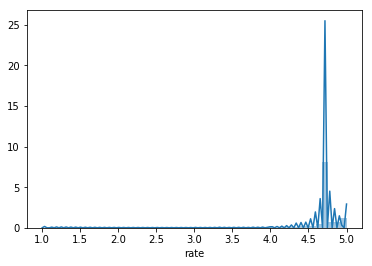

In [7]:
# Rate
tmp = mini_nights_deleted[mini_nights_deleted["rate"] > 0]
rate = mini_nights_deleted.copy()
rate["rate"] = rate["rate"].replace(0,tmp["rate"].mean())
sns.distplot(rate["rate"])

For the rate feature, we use mean to fill out the missing value. and we can find that most of the rate are concerctrated on 4.0-5.0

And for the rest numercal features, there value seem reasonable in in first round check. And we won't change them right now.

So far, we have conver the price to the log(price + 1) and using z-score to delete the outliers. We will train model to fit the log(price+1). Then, we use boxplot to find the outlier of minimum_night, we directly use log(minumum_nights)

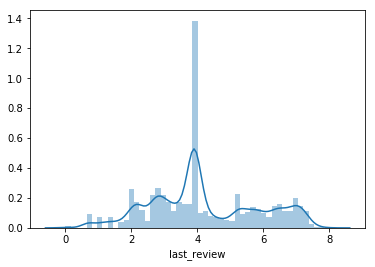

In [22]:
## Last_review
last_review = rate.copy()
last_review["last_review"] = pd.to_datetime(last_review["last_review"], format='%Y-%m-%d')
max_date = last_review["last_review"].max()
last_review["last_review"] = (max_date - last_review["last_review"]).dt.days
last_review["last_review"] = last_review["last_review"].fillna(last_review[~last_review["last_review"].isna()]["last_review"].median())
sns.distplot(np.log(last_review["last_review"]+1))
# rate

## Categorical Features

neighbourhood_group, neighbourhood, room_type, last_review

221


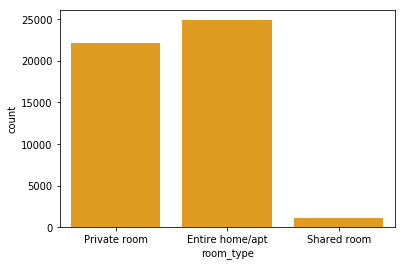

In [9]:
cat_list = ["neighbourhood_group", "neighbourhood", "room_type"]


# print(rate[cat_list].info())

# sns.countplot(  x = last_review["neighbourhood_group"] , color="skyblue")
group_size = last_review.groupby(by='neighbourhood').size()
print(len(group_size))
sns.countplot(x = last_review["room_type"], color= "orange")

Neighbourhood have too many unique value, if we use one-hot encode, the feature will be too sparse. For the orther cate features, we can use one-hot directly

## Relation analysis

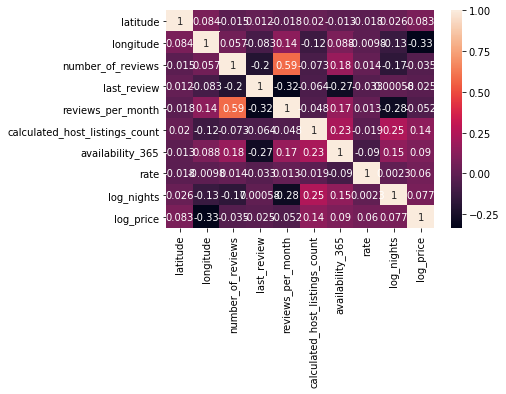

In [17]:
x_labels = ["latitude", "longitude", "number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count",
           "availability_365","rate","log_nights","room_type","neighbourhood_group", "neighbourhood" ]
y_labels = [ "log_price"]
labels = x_labels + y_labels
sns.heatmap(last_review[labels].corr(),annot=True)
# sns.h(x = "rate", y = "log_price", data = last_review,kind = 'reg')


In [20]:
last_review.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'review', 'rate', 'log_price', 'log_nights'],
      dtype='object')